# Set up necessary modules and connections for notebook

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn.apionly as sns

%matplotlib inline

# Limit rows disp# Limit rows displayed in notebook
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 2)

plt.style.reload_library()
# style.use('tableau10')

# def set_labels(ax,title, x,y):
#     ax.set_title(title)
#     ax.set_xlabel(x)
#     ax.set_ylabel(y)
#     return ax

# def change_legend_text(labels):
#     legend = plt.legend()
#     legend_texts = legend.get_texts()
#     for i in range(0,len(labels)):
#         legend_texts[i].set_text(labels[i])

# set default figure size
#plt.rc("figure", figsize=(12, 7))

In [11]:
plt.style.reload_library()
plt.style.use('tableau10')

def set_labels(ax,title, x,y):
    ax.set_title(title)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    return ax

def change_legend_text(labels):
    legend = plt.legend()
    legend_texts = legend.get_texts()
    for i in range(0,len(labels)):
        legend_texts[i].set_text(labels[i])
        
def annotate_bars(ax, size=10, ha='center'):
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), size=size, ha=ha)

In [13]:
%run '00_database_connectivity_setup.ipynb'

,x,y
0,0.39,0.03
1,0.06,0.71
2,0.14,0.49
3,0.91,0.21
4,0.99,0.81


In [14]:
%%execsql
set search_path to yelp;

# Exploring Business Data

In [7]:
%%showsql
select * from business_meta limit 5;

,business_id,city,full_address,latitude,longitude,name,open,review_count,stars,state
0,k1A8pNspBPinGDivxkuDSA,Pittsburgh,"503 Martindale St\nNorth Side\nPittsburgh, PA 15212",40.45,-80.01,Clark Bar & Grill,1,7,3.5,PA
1,oOo0xGOVq7cYTP1fORdoFg,Chandler,"7131 W Ray Rd\nChandler, AZ 85226",33.32,-111.96,Aj's Purveyor of Fine Foods,1,83,4.0,AZ
2,MEraJIKYztC7IOzYwMe86g,Phoenix,"502 W Camelback\nPhoenix, AZ 85013",33.51,-112.08,Raimondo's,0,16,3.5,AZ
3,n1G7Dtr7y7gFpEf_f7SkBA,Phoenix,"664 W Camelback Rd\nPhoenix, AZ 85013",33.51,-112.08,Artistic Tattoo,1,9,4.0,AZ
4,q8P4EZkDgzHQodbQSbxSiw,Scottsdale,"14826 N. Pima Road\nScottsdale, AZ 85251",33.65,-111.89,Islands Fine Burgers & Drinks,0,3,2.0,AZ


In [74]:
%%showsql
select * from business_attributes limit 5;

,business_id,key_attribute_acceptscreditcards,key_attribute_acceptsinsurance,key_attribute_agesallowed,key_attribute_alcohol,key_attribute_ambience_casual,key_attribute_ambience_classy,key_attribute_ambience_divey,key_attribute_ambience_hipster,key_attribute_ambience_intimate,key_attribute_ambience_romantic,key_attribute_ambience_touristy,key_attribute_ambience_trendy,key_attribute_ambience_upscale,key_attribute_attire,key_attribute_byappointmentonly,key_attribute_byob,key_attribute_byob/corkage,key_attribute_caters,key_attribute_coatcheck,key_attribute_corkage,key_attribute_delivery,key_attribute_dietaryrestrictions_dairy-free,key_attribute_dietaryrestrictions_gluten-free,key_attribute_dietaryrestrictions_halal,key_attribute_dietaryrestrictions_kosher,key_attribute_dietaryrestrictions_soy-free,key_attribute_dietaryrestrictions_vegan,key_attribute_dietaryrestrictions_vegetarian,key_attribute_dogsallowed,key_attribute_drive-thru,key_attribute_goodfor_breakfast,key_attribute_goodfor_brunch,key_attribute_goodfordancing,key_attribute_goodfor_dessert,key_attribute_goodfor_dinner,key_attribute_goodforgroups,key_attribute_goodforkids,key_attribute_goodfor_latenight,key_attribute_goodfor_lunch,key_attribute_hairtypesspecializedin_africanamerican,key_attribute_hairtypesspecializedin_asian,key_attribute_hairtypesspecializedin_coloring,key_attribute_hairtypesspecializedin_curly,key_attribute_hairtypesspecializedin_extensions,key_attribute_hairtypesspecializedin_kids,key_attribute_hairtypesspecializedin_perms,key_attribute_hairtypesspecializedin_straightperms,key_attribute_happyhour,key_attribute_hastv,key_attribute_music_backgroundmusic,key_attribute_music_dj,key_attribute_music_jukebox,key_attribute_music_karaoke,key_attribute_music_live,key_attribute_music_playlist,key_attribute_music_video,key_attribute_noiselevel,key_attribute_open24hours,key_attribute_orderatcounter,key_attribute_outdoorseating,key_attribute_parking_garage,key_attribute_parking_lot,key_attribute_parking_street,key_attribute_parking_valet,key_attribute_parking_validated,key_attribute_paymenttypes_amex,key_attribute_paymenttypes_cashonly,key_attribute_paymenttypes_discover,key_attribute_paymenttypes_mastercard,key_attribute_paymenttypes_visa,key_attribute_pricerange,key_attribute_smoking,key_attribute_take-out,key_attribute_takesreservations,key_attribute_waiterservice,key_attribute_wheelchairaccessible,key_attribute_wi-fi
0,0QFxzJAd_6SQ55LSTc_v4g,true,None,None,None,None,None,None,None,None,None,None,None,None,None,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,false,true,false,false,false,None,None,None,None,None,2,None,None,None,None,true,None
1,1gqAgVvL-PDpvlH7yOlz5A,true,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,false,false,false,false,false,None,None,None,None,None,None,None,None,None,None,None,None
2,4_s27kzUyuPwGQyz8NGuSg,true,None,None,None,None,None,None,None,None,None,None,None,None,casual,None,None,None,None,None,None,false,None,None,None,None,None,None,None,None,None,false,false,None,false,false,true,None,false,false,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,true,None,None,None,None
3,50cJrzHLMDQiazc-w0V2gA,true,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,true,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

## Review Data

In [168]:
%%showsql
select * from review limit 5

,business_id,review_id,review_date,stars,review_text,user_id,votes_cool,votes_funny,votes_useful
0,BBcNrsJ_KONXnBno2etaug,Grw-XioiW4EsKO2iSXuKWA,2014-05-10,1,"I'm taking the previous poster's advice and contacting the BBB.\n\nAfter nearly 5 hellish years with Mozart, this week I received a notice from them stating that they weren't renewing my lease.\n\nWhen I called the only incident they pointed to as an explanation was because I warned my neighbors of the peeping Tom that was masturbating outside of our windows on the fire escape. There are numerous young college aged females that live in the building and Mozart refused to install motion lighting of any kind. After the 3rd incident I contacted an attorney, warned every tenant with a notice and threatened to contact the media if they didn't do anything about it. They still refuse to install motion detected lighting, there are just very dim fluorescent lights out there now instead.\n\nMozart then began updating my apartment on the guise that they were bettering it for me, when in actuality they were doing it so they could show it to others. They put in new floors and a new cabinet -- I even had to stay in a hotel (at my own expense) because of the dust, dirt and lack of a floor in my bathroom! I posted a picture showing my bathroom one day when I needed to \""go.\""\n\nToday, I posted an art mosaic that I was sure to point out when they were showing my apartment. The mosaic, posted inside my apartment, provides ample warning that this apartment came with \""strings attached\"" -- a sexual deviant.\n\nI posted a photo of the art mosaic on my facebook page too, for you to see as well:\nhttp://www.facebook.com/photo.php?pid=42421164&l=67fe64e8eb&id=14209556\n\nIt says:\n\n\n\nFUTURE TENANT (S): \n\nTHIS APARTMENT COMES WITH A PEEPING TOM.\n\nI m not allowed to renew my lease because I warned all of the other tenants in the building after the 3rd incident of him masturbating outside my window. (staring through blinds) \nMozart still refuses to install motion lighting\n\nRead all of the nightmares about Mozart Management (aka NALCO) at ApartmentRatings.com\n\n\nRead more: http://www.apartmentratings.com/rate/PA-Pittsburgh-Mozart-Management-1020286.html#ixzz0bwwaLXMg",a92UhSg9_xhZYOEKxfbtMQ,0,1,2
1,cH8I7JgPXcrcutT1a3YrjQ,wmHT0rywSOpTpzrgLupYSA,2013-03-17,4,"I am a big fan of It's Greek to Me in Brookline. This tiny little place at the edge of Brookline doesn't look like much, but it has a real family character, cheap eats and tasty food.\n\nI have dined in twice and got carry out twice as well. The first time I got a platter/dinner, but I found the deal is really to be had with the gyros. Getting two gyros and a huge amount of fries for only $10 is a steal. The gyro bread is toasted, but still soft and it is loaded with meat like your grandma would try to feed you. The veggies have always tasted fresh and it is served hot. If I could change on thing, I would prefer fresh herbs on the gyro instead of dried. This gyro is definitely more spiced up than your chain restaurant gyro. The fries are fresh cut and nothing is cooked until you order it.\n\nIf you choose to dine in, you will be greeted by the proprietor and casually asked to take a seat any where you like. This isn't the type of place for formalities. She will offer you some delicious Greek Tea (you have to try it) and take your order, cook it and then serve it to you. Sometimes you can hear bickering in the kitchen between her and her old man- but that only adds to the family atmosphere. The store does take credit card, so that's a great modern convenience. At the end of the meal, we've always gotten a stick of gum :)\n\nIf you choose to carry out, it's a simple call and your food is ready by the time you drive down there. There is usually a place to park near by and you can be on your way quickly.",aAlTMcBf-0Q9DewxhoCdEQ,0,0,1
2,nUISXnW2Jo9ovnoFBIUY_Q,fYgjRjGR-0RGx_tJxIZPMw,2010-10-17,4,"D'Amico's is a consistent, high food q

# Bar Charts

### How many businesses do we have by state?

In [7]:
df = psql.read_sql("""select state, count(*) from business_meta group by 1 order by 2 desc;""", conn)
df.head()

,state,count
0,AZ,25230
1,NV,16485
2,NC,4963
3,QC,3921
4,PA,3041


In [15]:
plt.style.use('tableau10')

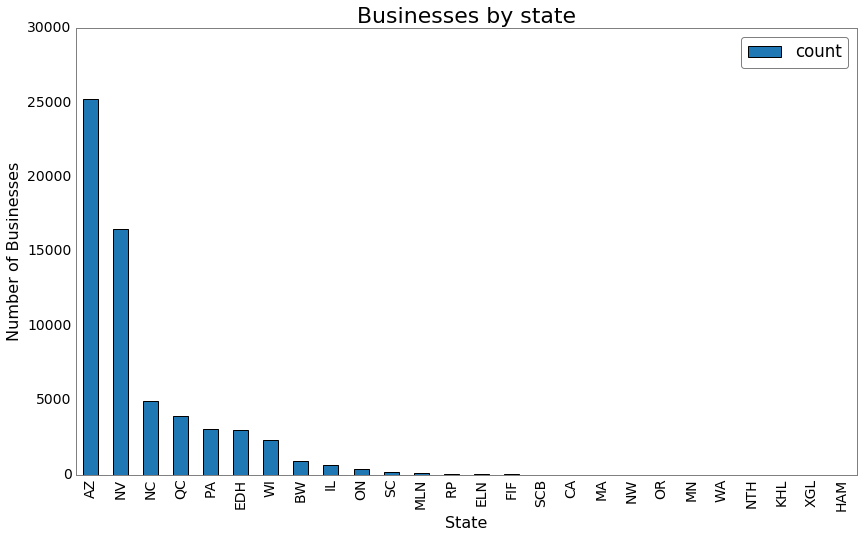

In [10]:
ax = df.plot(kind='bar', x=df['state'])
ax = set_labels(ax,'Businesses by state', 'State', 'Number of Businesses')

### How many open/closed restaurants are there by state?

In [235]:
sql = """
    select
        state
        ,open
        ,count(*)
    from
        business_meta
    group by 
        1,2
    ;
"""
df = psql.read_sql(sql,conn)
df.head()

,state,open,count
0,MLN,0,4
1,ELN,1,7
2,SC,0,32
3,KHL,1,1
4,SCB,1,3


+ __using seaborn__

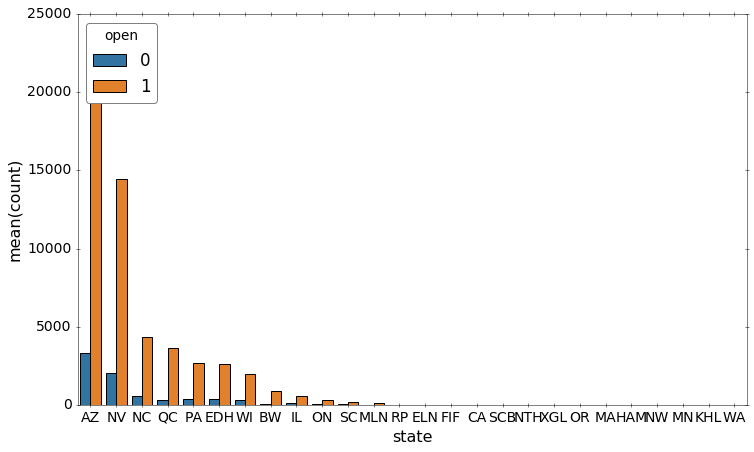

In [236]:
# using seaborn
#with plt.style.context(('default')):
ax = sns.barplot(x='state',y='count',hue='open', data=df.sort_values('count', ascending=False))
# change_legend_text(['closed','open'])
# ax = set_labels(ax, 'Business statuses per state', 'state', 'count')
# labels = ax.get_xticklabels()
# ax = plt.setp(labels, rotation=40, horizontalalignment='center')


+ __using pandas__

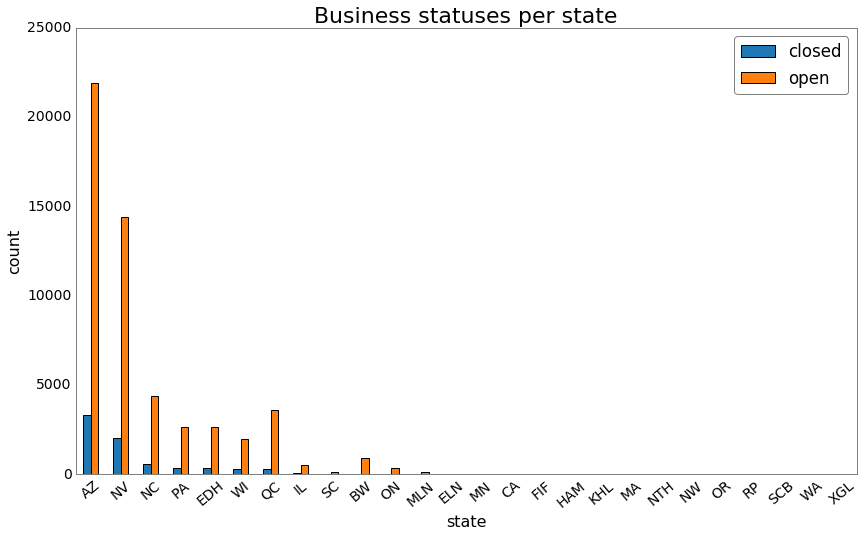

In [17]:
df = df.pivot('state', 'open')

ax = df.sort_values(by=[('count', 1)], ascending=False).plot(kind='bar', rot=40)
change_legend_text(['closed','open'])
ax = set_labels(ax, 'Business statuses per state', 'state', 'count')


### How many businesses are there per city?

In [40]:
sql = """
    select 
        city||', '||state as city_state
        ,count(*) as num_businesses
    from 
        business_meta
    group by
        1
    order by 2 desc
    limit 20;
"""

df = psql.read_sql(sql,conn)
df.head()

,city_state,num_businesses
0,"Las Vegas, NV",13600
1,"Phoenix, AZ",8410
2,"Charlotte, NC",4224
3,"Scottsdale, AZ",4039
4,"Edinburgh, EDH",2930


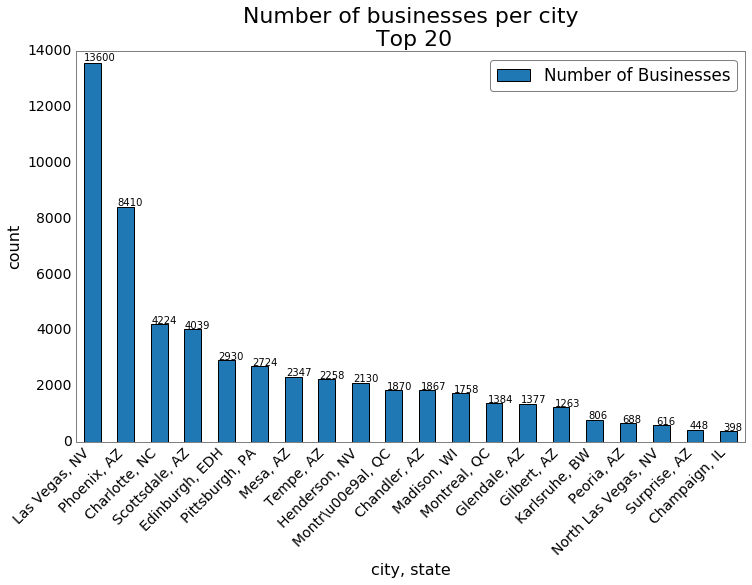

In [73]:
ax = df.plot(kind='bar', x='city_state')
ax = set_labels(ax, 'Number of businesses per city\n Top 20', 'city, state', 'count')
change_legend_text(['Number of Businesses'])
labels = ax.get_xticklabels()
_ = plt.setp(labels, rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), size=10)

### How many reviews per star rating?

In [131]:
sql = """
    select 
        stars
        ,count(*)
    from 
        review
    group by 1
"""

df = psql.read_sql(sql,conn)
conn.commit()
df

,stars,count
0,2,140608
1,4,466599
2,1,159811
3,3,222719
4,5,579527


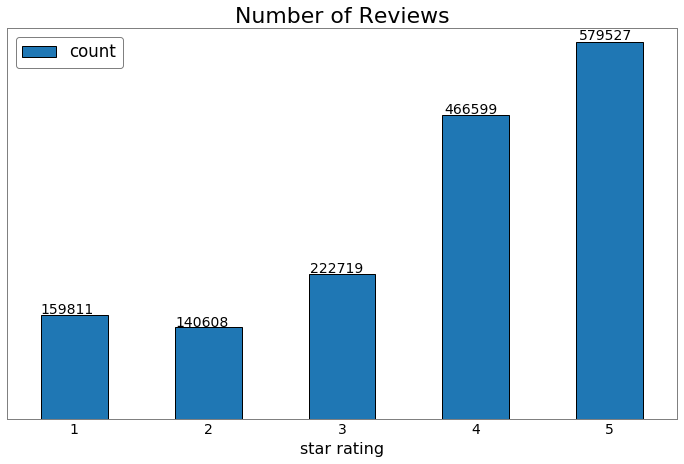

In [151]:
ax = df.sort_values(by='stars').plot(kind='bar', x='stars', rot=0)
ax.get_yaxis().set_visible(False)
annotate_bars(ax, 14, 'left')
ax = set_labels(ax, 'Number of Reviews', 'star rating', '')

In [9]:
sql = """
    select 
        stars
        ,avg(votes_funny::int) as votes_funny
        ,avg(votes_cool::int) as votes_cool
        ,avg(votes_useful::int) as votes_useful
    from 
        reviews
    group by 1
"""

df = psql.read_sql(sql,conn)
conn.commit()
df

,stars,votes_funny,votes_cool,votes_useful
0,2,0.59,0.44,1.21
1,4,0.49,0.72,1.08
2,1,0.60,0.30,1.32
3,3,0.53,0.59,1.05
4,5,0.39,0.61,0.97


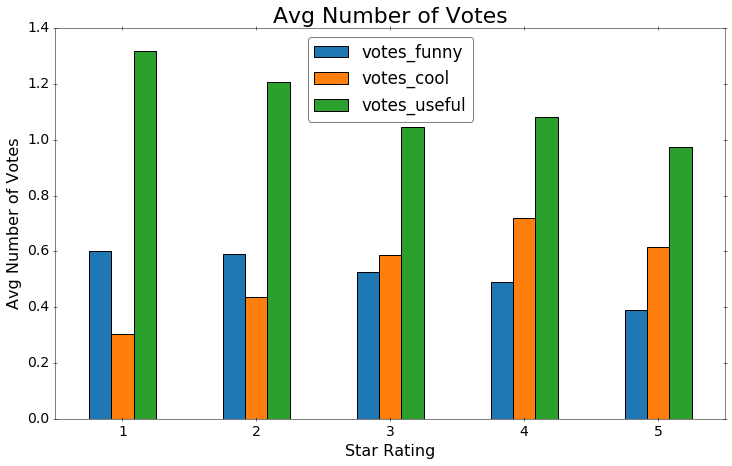

In [12]:
#df = df.set_index(['votes_funny','votes_cool','votes_useful'])
ax = df.sort_values(by='stars').plot(kind='bar', x='stars', rot=0)
ax = set_labels(ax, 'Avg Number of Votes', 'Star Rating', 'Avg Number of Votes')
#annotate_bars(ax,size=15, ha='left')

### Rating Distribution by top 10 categories

In [41]:
%%showsql
select split_categories,count(*) from business_categories group by 1 order by 2 desc limit 100;

,split_categories,count
0,Restaurants,20608
1,Food,6477
2,Shopping,6372
3,Nightlife,3924
4,Beauty & Spas,3703
5,Shopping,2547
6,Active Life,2257
7,Event Planning & Services,2222
8,Health & Medical,2173
9,Bars,2128


# Histograms

### What is the distribution of star ratings?

In [167]:
sql = """
    select
        business_id
        ,stars
        ,open
        ,review_count
        ,state
    from 
        business_meta
    ;
"""

df = psql.read_sql(sql,conn)
conn.commit()

df.head()


,business_id,stars,open,review_count,state
0,kErvQNp9FZK4-TE3CqHXFQ,3.5,1,40,NV
1,w6bhabpSWS5qjFb1AT72vg,1.5,1,4,PA
2,YX844QzsEwTzJzIxQgR7Ow,4.0,1,8,AZ
3,NSGrSt6KZn8gDtqw_Vh1mA,2.5,1,15,QC
4,loMdTaHt7TkZ4mYt88Iphg,4.0,1,18,EDH


In [35]:
%%showsql
select count(*) from review

,count
0,1569264


In [16]:
sql = """
    select
        stars
        ,count(*)
    from
        businesses
    group by 1
    order by 1
"""
df = psql.read_sql(sql,conn)
df

,stars,count
0,1.0,637
1,1.5,1095
2,2.0,2364
3,2.5,5211
4,3.0,8335
5,3.5,13171
6,4.0,13475
7,4.5,9542
8,5.0,7354


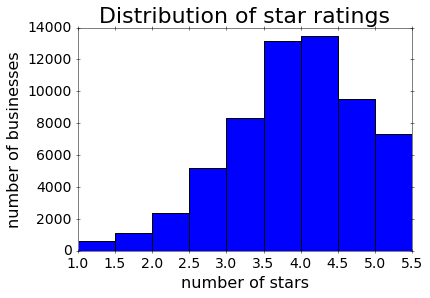

In [17]:
fig, ax = plt.subplots()
ax.bar(df['stars'], df['count'], width=.5)
ax = set_labels(ax,'Distribution of star ratings', 'number of stars', 'number of businesses')

### Getting bins for larger datasets

In [3]:
%%execsql
drop type if exists bins cascade;
create type bins as (
    bin integer
    ,bin_left double precision
);


drop function if exists get_bins(numeric, numeric, numeric, integer) cascade;
create or replace function get_bins(
    col numeric
    ,col_min numeric
    ,col_max numeric
    ,num_bins integer
) returns bins as
$$
    
    bin_size = float((col_max-col_min)/num_bins)
    plpy.info(bin_size)
    bin = int((col - col_min)/bin_size)
    bin_left = map(lambda x: x*bin_size+col_min,range(0,num_bins+1))
    return [bin, bin_left[bin]]

$$ language plpythonu;

In [29]:
sql = """
select * from (
    select
        bin
        ,bin_left
        ,coalesce(count(*),0) as count
    from (
        select
            business_id
            ,stars
            ,(get_bins(stars::numeric, min(stars) over ()::numeric, max(stars) over()::numeric, 10)).*
        from 
            business_meta
    ) t1
    
    group by 1,2) t2
    full outer join (
            select
                generate_series(0,10) as bin
                ,(generate_series(0,10))*.4 + min_stars as bin_left
            from (
                select min(stars) as min_stars from business_meta) minstars
        ) allbins
        using (bin, bin_left)
"""

df = psql.read_sql(sql, conn)
conn.commit()
df



,bin,bin_left,count
0,0,1.0,637.0
1,1,1.4,1095.0
2,2,1.8,2364.0
3,3,2.2,5211.0
4,4,2.6,NaN
5,5,3.0,8335.0
6,6,3.4,13171.0
7,7,3.8,13475.0
8,8,4.2,9542.0
9,9,4.6,NaN


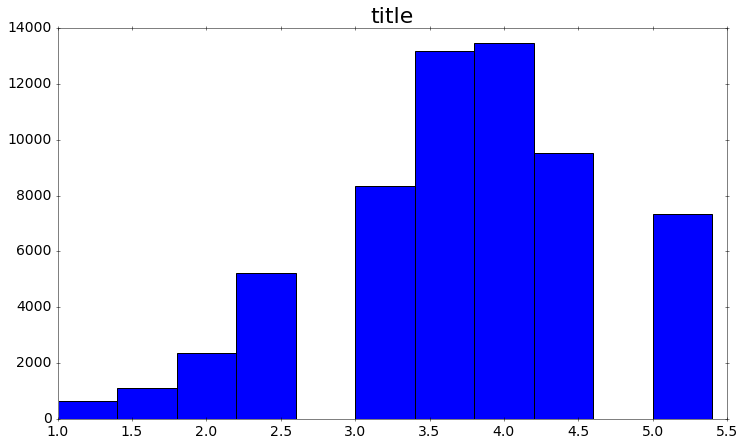

In [206]:
fig, ax = plt.subplots()
ax.bar(df['bin_left'], df['count'], width=.4)
ax = set_labels(ax,'title','','')

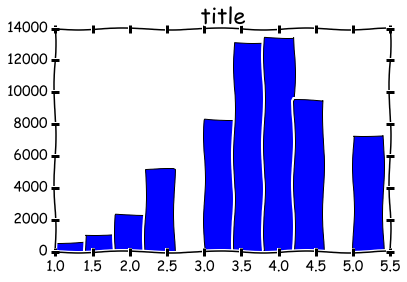

In [30]:
plt.xkcd()
fig, ax = plt.subplots()
ax.bar(df['bin_left'], df['count'], width=.4)
ax = set_labels(ax,'title','','')

### What is the distribution of the number of ratings per business?

In [ ]:
sql = """
    select 
        business_id
        ,review_count
    from 
        business_meta
    ;
"""

df = psql.read_sql(sql,conn)
df.head()

In [22]:
sql = """
    select 
        business_id
        ,review_count
    from 
        business_meta
    ;
"""

df = psql.read_sql(sql,conn)
df.head()

,business_id,review_count
0,K-50BBoi1Sens8u36nBo-Q,4
1,3ornwb5L2Cy-DKeR6xbpdw,57
2,DhM8j_-qzap03joV93851Q,6
3,Nf2Vj8R6So6_jeX-YhAdJA,84
4,0RIAwEggED60mK3mDSTr-Q,45


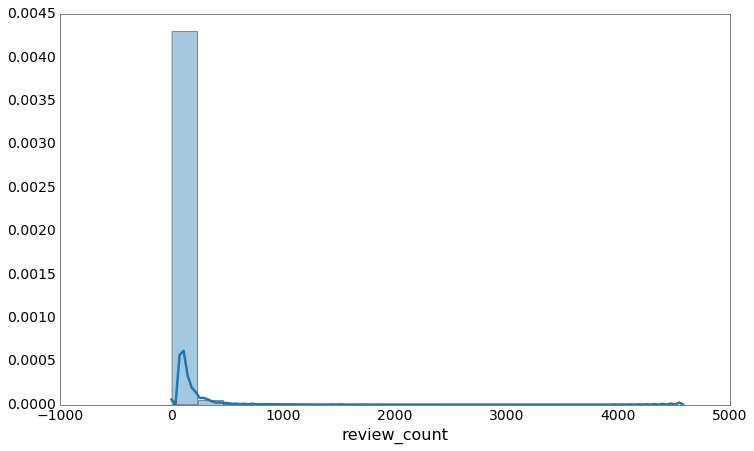

In [32]:
ax = sns.distplot(df['review_count'], bins=20)

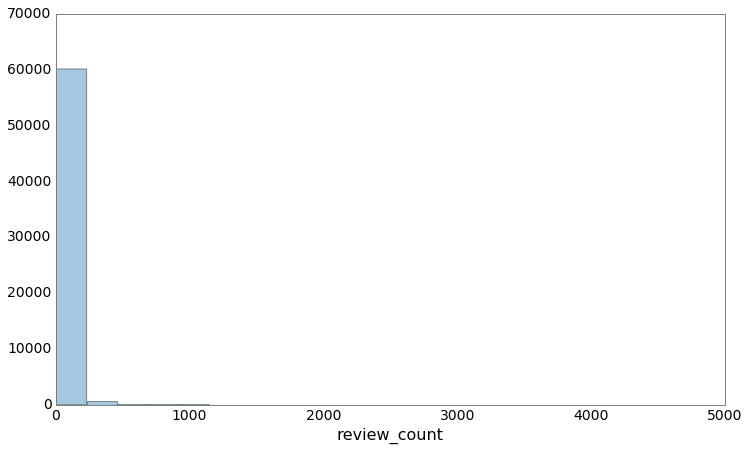

In [31]:
ax = sns.distplot(df['review_count'], bins=20, kde=False)

### Distribution of review count by state

In [35]:
sql = """
    select 
        business_id
        ,state
        ,review_count
    from 
        business_meta
    ;
"""

df = psql.read_sql(sql,conn)
df.head()

,business_id,state,review_count
0,bewtZL-VV1oeGUdAhHVz6Q,AZ,24
1,PMpQAV7glwhKhnHfDa30Dg,NV,12
2,PXXFn3kalXTgaWwndlQWHw,NV,156
3,AYUsvTmTcC31y36A2L3hPQ,AZ,4
4,q7DzFSkt1ColaWrAOw7rFw,AZ,6


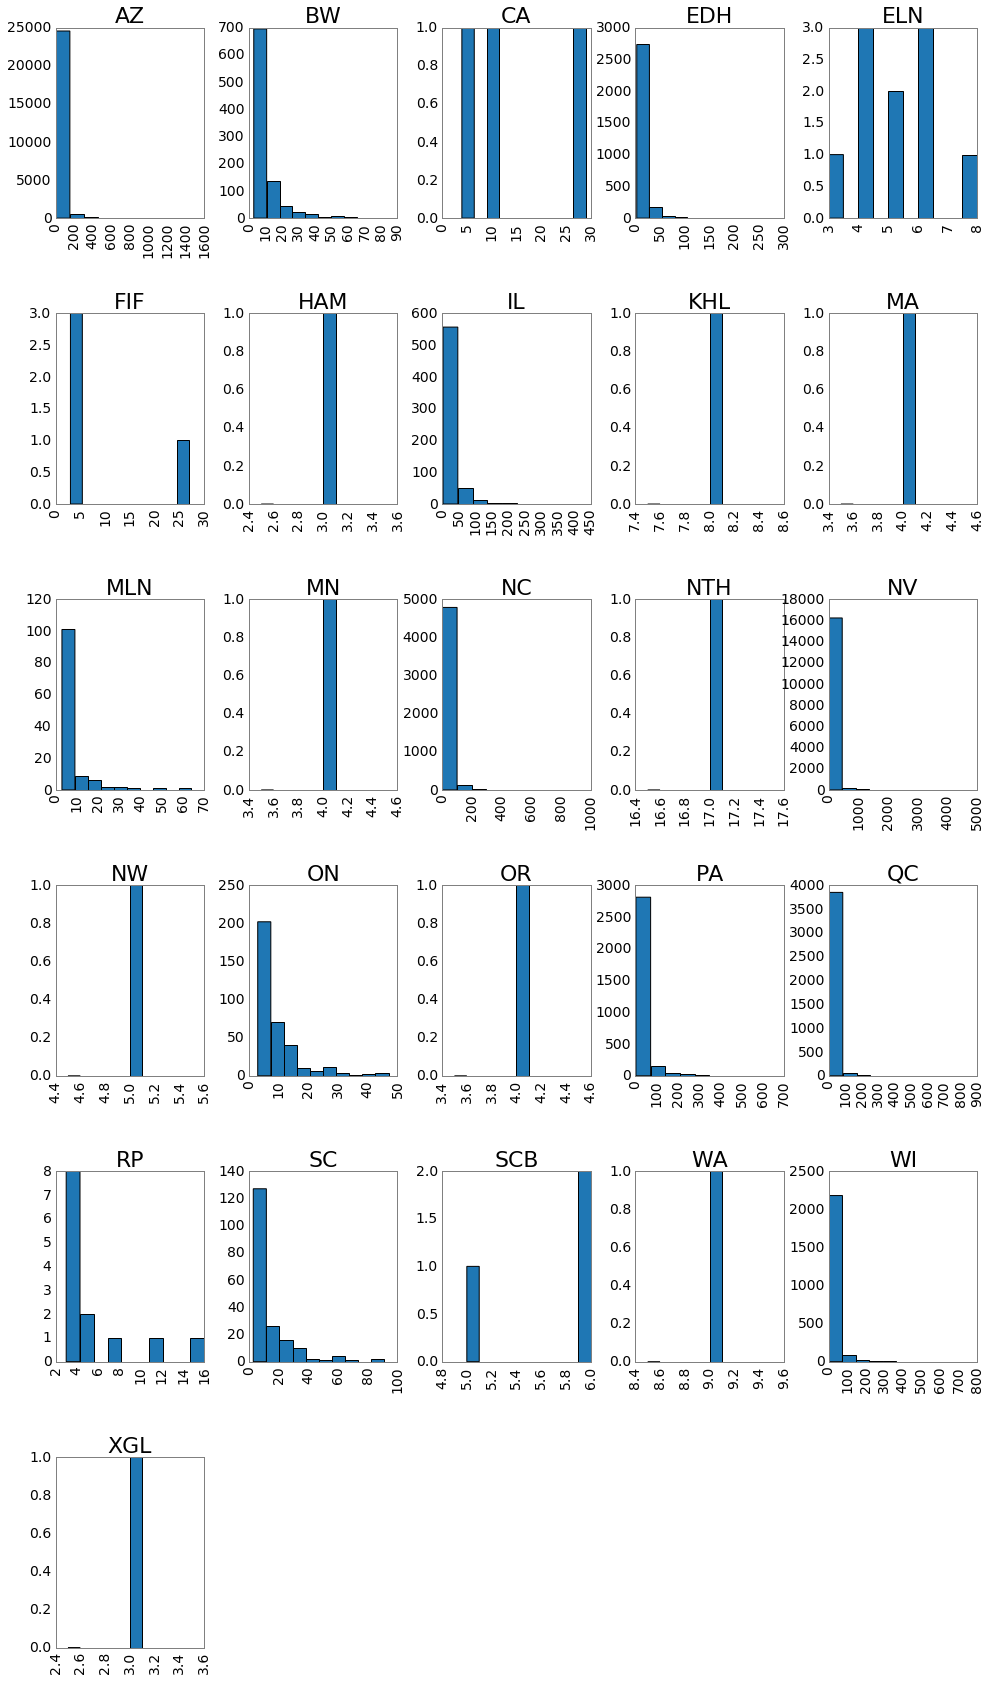

In [39]:
ax = df.hist(by='state', figsize=(16,30))

### Distribution of Votes

In [169]:
%%showsql
select * from review limit 5;

,business_id,review_id,review_date,stars,review_text,user_id,votes_cool,votes_funny,votes_useful
0,mVHrayjG3uZ_RLHkLj-AMg,VDTIbR3G5_IPkpXbo2MutA,2014-03-22,5,Seen this restaurant on 25 best places in Pittsburgh with Rick Seback\nack. Went there with my girlfriend she grew up with the owner. She's very nice all employees are super nice service was excellent i had the fish sandwich my girlfriend had the Ruben more than you could possibly eat very reasonable prices. Going back to try the burgers i heard there enormous and very tasty.,345nDw0oC-jOcglqxmzweQ,1,0,2
1,-KQ283hJkBO12u8XOrlCcQ,MrLPAJbNjNA0xrZHNAtXBw,2012-06-10,4,"Great lunch in Market Square, and it is a PGH institution. The food is awesome, low prices, and a sick poster of Rocky Marciano. Definitely worth the time if you are working in downtown.",RVZFnkpxbRLMPhk35vRBSQ,0,0,0
2,-KQ283hJkBO12u8XOrlCcQ,rWHrvTl194jMYaBGHeLdHg,2013-03-31,4,"OOH is a cross between a British Pub and an old-fashioned American counter-top dinner. The decor provides a traditional feel (and so does its clientele).\n\nI decided on the Fish-n-Chips and was almost tempted to order a side too given the inexpensive prices which must be as old as the restaurant; the Fish-n-chips were $7.50. Given the price, I was a bit skeptical of the quality of the food but found myself content once I had a bite. Both the fish and fries were crispy and had a pleasant taste from the batter. My only complaint was that the fish came in three pieces as opposed to one large piece. \n\nAlso, OOH has a house-made pepper vinegar sauce which I decided to try. The basket was sufficient without the vinegar, yet I enjoyed it so much that I decided to generously apply it to.",59A-ZxUMOgIl2MAnySh-Aw,0,0,2
3,q9B1h5eGBvHjQLF10puUkQ,IJThmZ_gcvaCGwoDXID9BQ,2009-11-25,1,"On name alone we HAD to check this place out, just for kicks.\n\nOuch!\n\nBandaids indeed; this place hurts and not in a good way. And you might want to spritz that with some iodine for good measure.\n\nI've got no qualms with talent, don't get me wrong; the female form is a beautiful thing to behold in all of its varied curve-tastic shape and form. A woman is a woman is a beautiful woman, and I'm a sucker. By default, naked womanhood warrants an automatic 3-star baseline from me, but the slummy and desperate atmosphere in this dive is a soulsuck for all that dare enter.\n\nThe squat brick building sits all by its lonesome under a tacky illuminated \""Bandaids Show Lounge\"" sign, the surrounding parking lot emanating with \""damn, I'mma get mugged out here\"" uncertainty and darkness.\n\nOnce inside (yes, you go in through a sketchy looking front door that looks as welcoming as the sketchy looking service door), you're met by security and carded; the girls headed for the bar while another friend and myself were subjected to a [sub-standard*] pat down - *sub-standard: the folding knife clipped and visible in my front pocket (CA law) went unnoticed. A printed \""no sideways caps, no baggy/saggy jeans, no long tees\"" dress code posted by the door should have been a red flag. Classy!\n\nAfter getting a few beers from the pretty bartender (she was actually really, really good-looking - hottest girl on staff, setting false precedent for what the stage talent would look like), we made our way past shady regulars at the bar with their necks crook'd to the lounge, finding a couple of tables near, but not next to, the center stage.\n\nMost of us sat talking and laughing with each other, occasionally glancing at the stage just to see what's up and watching the depraved humanity of the other patrons in the place, mostly empty on a Friday night...\n... the out-of-towner business man in the dark corner, getting dances from any girl that would come his way.\n... the mouth-breather waiting with stalker-ish anticipation for a dance with one of the, er, more amply-bossomed strippers.\n... the table of youngins, dressed exactly how the posted dress code prohibited.\n\nGirl after girl (

In [30]:
sql = """
    select 
        votes_cool
        ,votes_funny
        ,votes_useful
    from 
        review
"""

df = psql.read_sql(sql,conn)
df.head()

,votes_cool,votes_funny,votes_useful
0,1,1,2
1,0,1,1
2,0,0,0
3,0,0,0
4,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f11b190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f37d250>]], dtype=object)

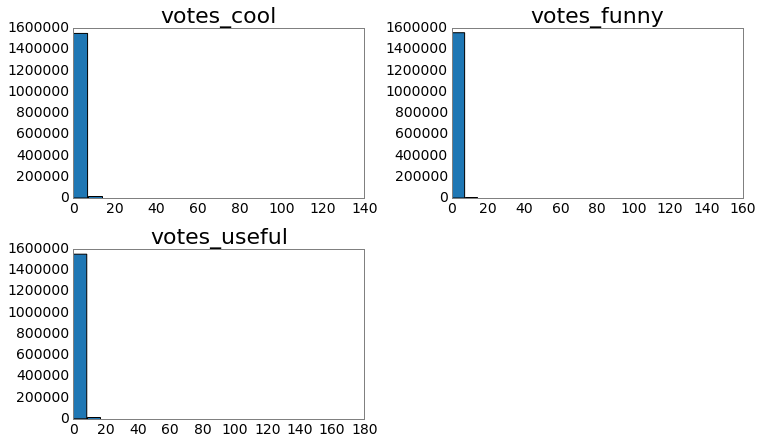

In [14]:
df.hist(bins=20)

## Box Plots

### Boxplot of stars

In [9]:
sql = """
    select
        business_id
        ,stars
        ,state
        ,city
    from
        business_meta
"""

df = psql.read_sql(sql,conn)
df.head()

,business_id,stars,state,city
0,kErvQNp9FZK4-TE3CqHXFQ,3.5,NV,Las Vegas
1,w6bhabpSWS5qjFb1AT72vg,1.5,PA,Pittsburgh
2,YX844QzsEwTzJzIxQgR7Ow,4.0,AZ,Phoenix
3,NSGrSt6KZn8gDtqw_Vh1mA,2.5,QC,Montr\u00e9al
4,loMdTaHt7TkZ4mYt88Iphg,4.0,EDH,Edinburgh


(0.5, 5.5)

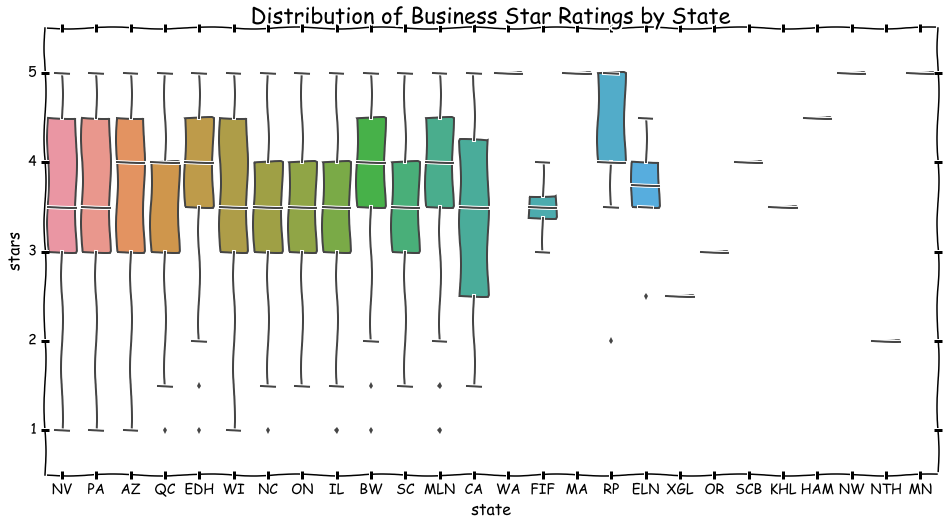

In [11]:
plt.xkcd()
ax = sns.boxplot(x='state',y='stars', data=df)
ax = set_labels(ax, 'Distribution of Business Star Ratings by State', 'state', 'stars')
ax.figure.set_size_inches(16,8)
plt.ylim([.5,5.5])




In [243]:
%%showsql
select * from business_meta where state='RP'

,business_id,city,full_address,latitude,longitude,name,open,review_count,stars,state
0,L1a6mmBdIzO431VImUCjpg,Hagenbach,Rheinstr. 1\n76767 Hagenbach,49.02,8.25,B\u00e4ckerei Konditorei Cafe La Minzbrueck Hagenbach,1,4,5.0,RP
1,qjq6u-ab0GGb2c4rvNZbzg,W\u00f6rth am Rhein,Raiffeisenstr. 3\n76744 W\u00f6rth am Rhein,49.03,8.29,Kaminstubb,1,4,5.0,RP
2,BrL4O85GLCyNqXNlBqeWiA,Jockgrim,Untere Buchstr. 19\n76751 Jockgrim,49.10,8.28,Piccolo Mondo,1,7,3.5,RP
3,qT-mx7itnS7_DtN3xX5BMg,W\u00f6rth am Rhein,Ludwigstra\u00dfe 43\n76744 W\u00f6rth am Rhein,49.05,8.27,Toni's Pizza Express,1,4,4.0,RP
4,vV7GV80je6uwWI-d4AYQEw,Hagenbach,Marienstr. 2\n76767 Hagenbach,49.02,8.25,Marien-Apotheke am Bahnhof,1,3,5.0,RP
5,i3-gDkBnCj7-2X3fDkkRXA,W\u00f6rth am Rhein,Karlstr. 16\n76744 W\u00f6rth am Rhein,49.03,8.29,Gastst\u00e4tte Einigkeit,1,4,5.0,RP
6,m_qz8AU3uu-Fl1zmHVAcCw,W\u00f6rth am Rhein,Bahnhofstr. 43a\n76744 W\u00f6rth am Rhein,49.05,8.27,Klaus B\u00f6ringer,1,5,5.0,RP
7,os1Tw29uPcoO79yyPctr_g,Hagenbach,Rheinstr. 4\n76767 Hagenbach,49.02,8.25,Zum Schwanen,1,5,4.0,RP
8,n2MHGb9UKtN9wL619jbz7w,Hagenbach,Stixw\u00f6rthstr. 4\n76767 Hagenbach,49.01,8.26,Stadtbrauhaus Hagenbach,1,3,4.0,RP
9,RqS90lYHh5QlWj9ISK1ymA,W\u00f6rth am Rhein,Cany-Barville-Str. 2\n76744 W\u00f6rth am Rhein,49.03,8.29,Gockelburg,1,16,4.5,RP


### Boxplot of review count

In [244]:
sql = """
    select
        business_id
        ,review_count
        ,state
        ,city
    from
        business_meta
"""

df = psql.read_sql(sql,conn)
df.head()

,business_id,review_count,state,city
0,69LC5sFIgNxnCFKReWc_aA,4,AZ,Mesa
1,KYJimECPaDmObYSdGU1rww,4,AZ,Mesa
2,RQ-Qsf5KJfd0v9_u5ssyvQ,14,AZ,Mesa
3,xXC8Kj1yr4u29Nl4uerd9w,5,AZ,Glendale
4,QJP-bRQvtGvShgs4AnvZKw,26,AZ,Phoenix


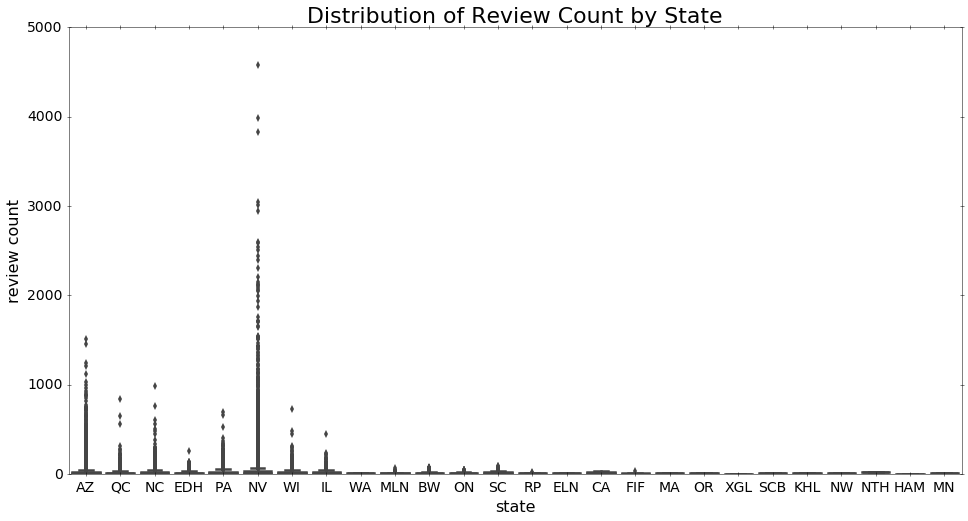

In [245]:
ax = sns.boxplot(x='state',y='review_count', data=df)
ax = set_labels(ax, 'Distribution of Review Count by State', 'state', 'review count')
ax.figure.set_size_inches(16,8)


## Scatter Plots

In [13]:
sql = """
    select
        review_id
        ,votes_funny
        ,votes_useful
        ,votes_cool
    from
        review
"""

df = psql.read_sql(sql,conn)
conn.commit()


In [ ]:
#plt.xkcd()
ax = df.plot.scatter(x='votes_funny',y='votes_cool')
mpld3.display(ax.figure)

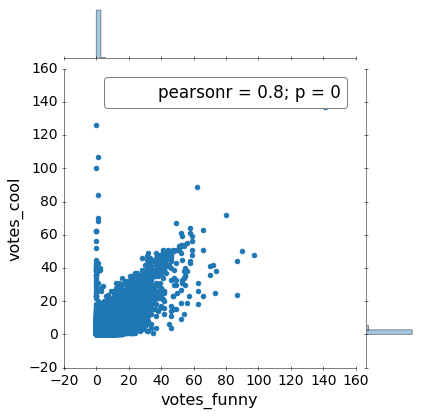

In [20]:
sns.jointplot(x='votes_funny', y='votes_cool',data=df)

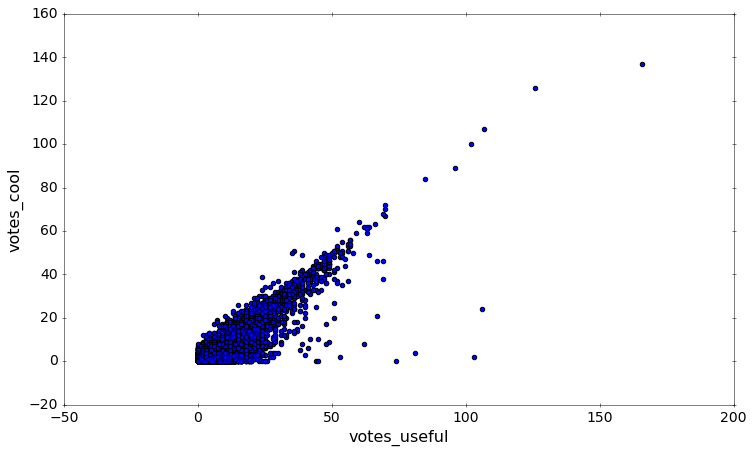

In [10]:
df.plot.scatter(x='votes_useful',y='votes_cool')

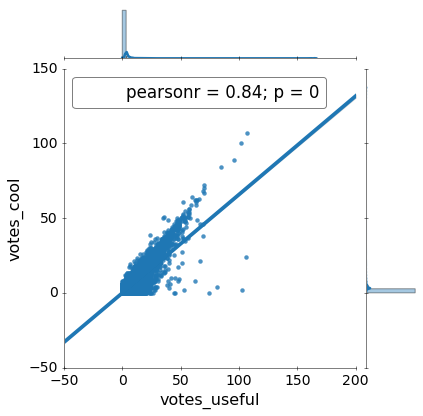

In [21]:
sns.jointplot(x='votes_useful', y='votes_cool',data=df, kind='reg')

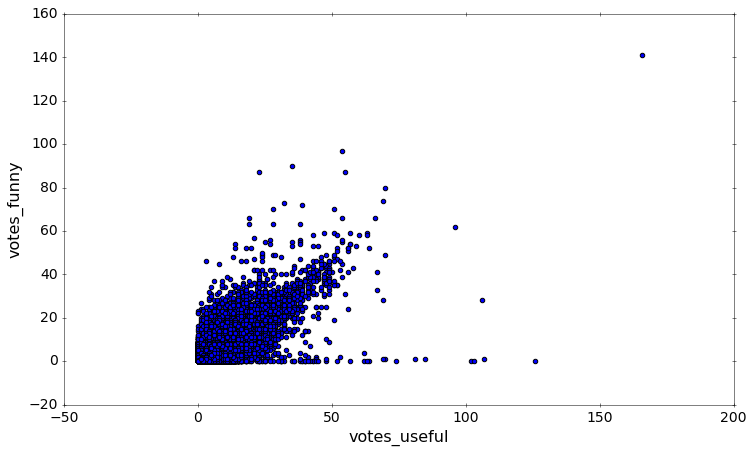

In [13]:
df.plot.scatter(x='votes_useful',y='votes_funny')

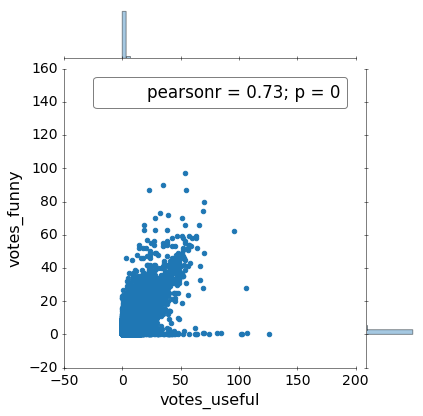

In [12]:
sns.jointplot(x='votes_useful', y='votes_funny',data=df)

In [23]:
sql = """
    select
        business_id
        ,review_count
        ,stars
        ,state
    from 
        business_meta

"""

df = psql.read_sql(sql,conn)
conn.commit()

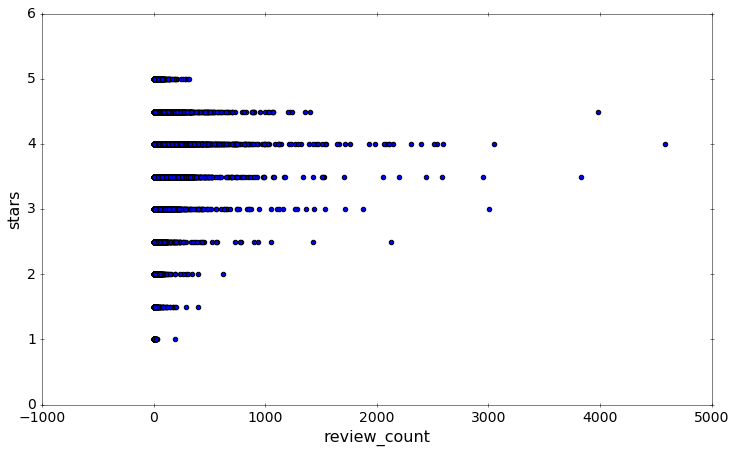

In [248]:
df.plot.scatter(x='review_count',y='stars')

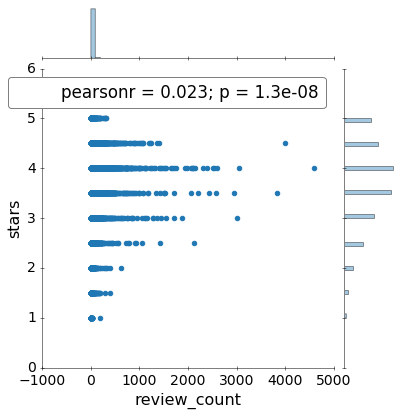

In [250]:
sns.jointplot(x='review_count', y='stars',data=df)

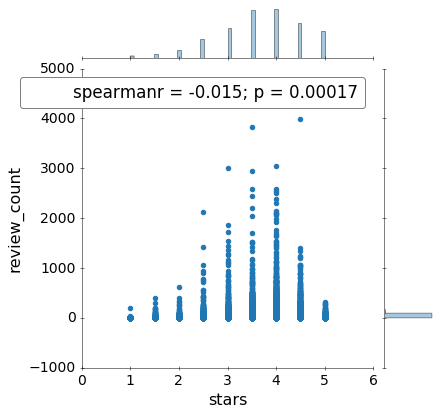

In [24]:
from scipy.stats import spearmanr
sns.jointplot('stars','review_count',data=df,stat_func=spearmanr)

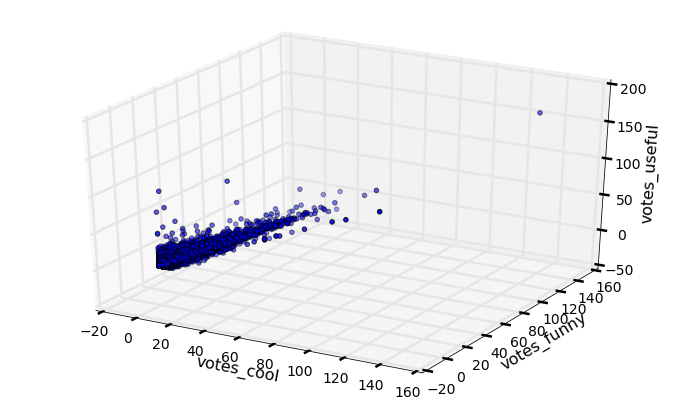

In [20]:
from mpl_toolkits.mplot3d import Axes3D

threed = plt.figure().gca(projection='3d')
threed.scatter(df['votes_cool'], df['votes_funny'], df['votes_useful'])
threed.set_ylabel('votes_funny')
threed.set_zlabel('votes_useful')
threed.set_xlabel('votes_cool')
plt.show()